<a href="https://colab.research.google.com/github/Kcurr01/HUT_Research/blob/main/VAE_1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Instalation 
---

In [25]:
# !pip install captum
# !pip install umap-learn
# !pip install datashader
# !pip install bokeh
# !pip install holoviews
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
VAE Initializaiton, Visualization and Training
--- 

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

# from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
# from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

import matplotlib.pyplot as plt
import seaborn as sns    
# import plotly.offline as py
# import plotly.graph_objs as go        
                
# from tqdm import tqdm

# import umap
# import umap.plot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#based on sensor data can you determine the stimulus that is currently in use?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

In [ ]:
#df = df.drop(columns=['series_id'])
df.head()

,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


In [ ]:
type(df)
#df.describe()
#df.plot()

pandas.core.frame.DataFrame

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()
#print(y.value_counts())

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>



In [ ]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


In [ ]:
y.head()

,stimulus
0,0
1,0
2,0
3,0
4,0


---
Visulaize number of lables

0     49599
8      6795
5      6782
6      6776
7      6776
11     6773
1      6753
12     6701
10     6696
2      6656
4      6654
9      6626
3      6613
Name: stimulus, dtype: int64

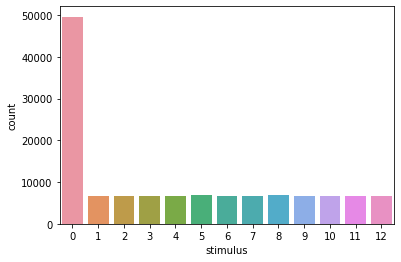

In [ ]:
sns.countplot(x = 'stimulus', data=df)
df.loc[:,'stimulus'].value_counts()

---
Visualize Data Disturbutions


In [ ]:
# #distribution of first 19 features


# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 20:
#     break 
# plt.tight_layout()


In [ ]:
X = df.iloc[:,1:].values
y = df.iloc[:, 0:1].values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).float()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).float()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).float()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

(130200, 19) <class 'numpy.ndarray'> (130200, 1) <class 'numpy.ndarray'>

X_train size: 78120 | X_val size: 26040 | X_test size: 26040
y_train size: 78120 | y_val size: 26040 | y_test size: 26040

Training Feature Split: (78120, 19) | Training Labels (78120, 1)
Validation Feature Split: (26040, 19) | Validation Labels (26040, 1)
Testing Feature Split: (26040, 19) | Testing Labels (26040, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([78120, 19]) , torch.Size([78120, 1])
Validation: torch.Size([26040, 19]) , torch.Size([26040, 1])
Testing:  torch.Size([26040, 19]) , torch.Size([26040, 1])


In [ ]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)

##########################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
latent_dim = 2
input_dim= 19
hidden_dim= 9
output_dim = 19
num_classes = 13

num_epochs= 100
batch_size= 100
learning_rate= 0.0001 #3e-4 #Karpathy constant


#beta = 1
beta = 0.001
alpha = 1

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


In [ ]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 13),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x))
    z = torch.tanh(z) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")

    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(batch_size,input_dim)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, classified, mu, logvar = vae(x)
  print(x_reconstructed.shape)
  print(mu.shape)
  print(logvar.shape)
  print(z_reparmeterized.shape)
  print(classified.shape)


torch.Size([100, 19])
torch.Size([100, 2])
torch.Size([100, 2])
torch.Size([100, 2])
torch.Size([100, 13])


In [ ]:
model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

def accuracy(y_pred, y_act):
  y_pred = torch.round(y_pred)
  correct = (y_pred == y_act)
  acc1 = correct.sum()/len(correct)
  acc2 = torch.round(acc1*100)
  # print(f"z_pred: {y_pred} | lable: {y_act} | correct: {correct} | accuracy {acc1} | accuracy {acc2}")
  return acc2

VAE(
  (fc1): Linear(in_features=19, out_features=9, bias=True)
  (mu): Linear(in_features=9, out_features=2, bias=True)
  (logvar): Linear(in_features=9, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=9, bias=True)
  (fc4): Linear(in_features=9, out_features=19, bias=True)
  (classifier): Sequential(
    (0): Linear(in_features=2, out_features=13, bias=True)
    (1): Sigmoid()
    (2): Softmax(dim=1)
  )
)


In [ ]:
train_losses=[]
val_losses=[]
train_accuracy = []
val_accuracy = []


dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  model.train()
  #print(f"zvalue loop begin {z}")
  train_running_loss = 0
  train_running_acc = 0
#  loop = tqdm(train_loader)
  for i, data in enumerate(train_loader):
    inputs, labels = data
    #print(f'type data: {type(data)}')
    #print(f'type inputs: {type(inputs)}')
    #print(f'type labels: {type(labels)}')

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)
    #print(x_reconstructed, type(x_reconstructed))
    #print(mu, type(mu))
    #print(logvar, type(logvar))

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss = alpha*reconstruction_loss + kld_loss*beta

    acc_train = accuracy(classified, labels)
    #print(reconstruction_loss, kld_loss, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

    train_running_acc += acc_train.item()
    train_acc = train_running_acc/len(train_loader)

  
  z_list, means, logvars , labels = list(), list(), list(), list()

  #Evaluation
  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      #print(labels)
      #inputs = torch.autograd.Variable(inputs)
      y_pred, z_reparmeterized, classified, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
      vloss = alpha*v_reconstruction_loss + v_kld_loss*beta
      #print(v_reconstruction_loss, v_kld_loss, vloss)

      # yhat = torch.max(z.data,1)
      # correct+=(yhat==y_test).sum().int()
      # accuracy = correct / n_test
      # accuracy_list.append(accuracy)
  

      # val_acc = accuracy(classified, labels)
      val_acc = 0

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      # log ...
      z_list.append(z_reparmeterized.detach())
      means.append(mu.detach())
      logvars.append(logvar.detach())
      labels.append(Y.detach())

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels))

  print(f"Epoch: {epoch+1}/{num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | total loss: {train_loss:.3f} | train acc: {train_acc:.3f} ||| Val Loss: {val_loss:.3f} | val acc: {val_acc:.3f}")
  print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accuracy.append(train_acc)
  



Epoch: 1 / 200 | reconst_loss: 3.104 | kldiv loss: 8.09943 | total loss: 24.054 | train acc: 495.662 ||| Val Loss: 16.296 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 200 | reconst_loss: 1.574 | kldiv loss: 24.58802 | total loss: 12.769 | train acc: 495.662 ||| Val Loss: 10.124 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 200 | reconst_loss: 0.801 | kldiv loss: 45.93206 | total loss: 8.234 | train acc: 495.463 ||| Val Loss: 6.572 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 4 / 200 | reconst_loss: 0.830 | kldiv loss: 72.12294 | total loss: 5.349 | train acc: 495.529 ||| Val Loss: 4.502 | val acc: 0.000
----------------------------------------------------------------------------------------------------

In [ ]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

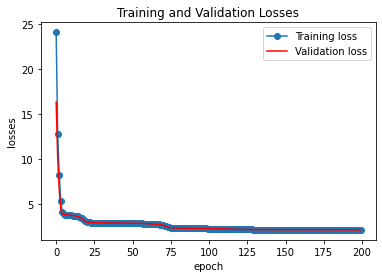

In [ ]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

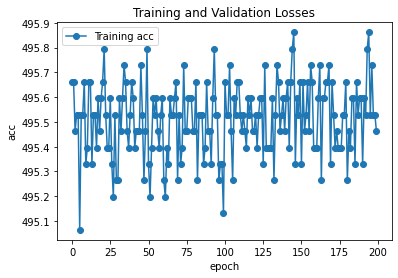

In [ ]:
plt.plot(train_accuracy,'-o', label="Training acc")
# plt.plot(val_acc,'-r',  label="Validation acc")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:
print("Latent Space Visualization")
for i in range (num_epochs):
  fig = plt.figure(figsize=(10,10))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()

  #Experiment 1
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('hsv', 13))
  cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],values=[0,1,2,3,4,5,6,7,8,9,10,11,12])

  #Experiment 3
  # plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
  #             cmap=plt.cm.get_cmap('hsv', 23))
  #cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
  
  cb.ax.tick_params(labelsize=10)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title(f'VAE train dataset with latent space Dim=2  Epoch number: {i+1} ', fontsize= 12)
  # plt.show()
  plt.close()
  fig.savefig(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i:001}" + ".png")
  print(f"Latent Space Image {i+1} stored.")

import imageio
gif = []
for i in range(num_epochs):
  each_image = imageio.imread(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i}" + ".png")# here read all images
  gif.append(each_image)
imageio.mimsave("/content/result.gif",gif)

from IPython.display import Image

fname = '/content/result.gif'
Image(open(fname, 'rb').read())  # local

Latent Space Visualization
Latent Space Image 1 stored.
Latent Space Image 2 stored.
Latent Space Image 3 stored.
Latent Space Image 4 stored.
Latent Space Image 5 stored.
Latent Space Image 6 stored.
Latent Space Image 7 stored.
Latent Space Image 8 stored.
Latent Space Image 9 stored.
Latent Space Image 10 stored.
Latent Space Image 11 stored.
Latent Space Image 12 stored.
Latent Space Image 13 stored.
Latent Space Image 14 stored.
Latent Space Image 15 stored.
Latent Space Image 16 stored.
Latent Space Image 17 stored.
Latent Space Image 18 stored.
Latent Space Image 19 stored.
Latent Space Image 20 stored.
Latent Space Image 21 stored.
Latent Space Image 22 stored.
Latent Space Image 23 stored.
Latent Space Image 24 stored.
Latent Space Image 25 stored.
Latent Space Image 26 stored.
Latent Space Image 27 stored.
Latent Space Image 28 stored.
Latent Space Image 29 stored.
Latent Space Image 30 stored.
Latent Space Image 31 stored.
Latent Space Image 32 stored.
Latent Space Image 33 

In [ ]:
# for i in range (num_epochs):
#   z_arr = dic['latent_space'][i].cpu().numpy()
#   y_arr = dic['y'][i].cpu().numpy()
#   plt.figure(figsize = (10,5))
#   plt.subplot(1,2,1)
#   plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr)
#   plt.colorbar()
#   plt.tight_layout()

---
VAE Experiment 1 **[]** 1/10
---

In [1]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
# from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

# import plotly.offline as py
# import plotly.graph_objs as go        
  
# from tqdm import tqdm

# import umap
# import umap.plot

#based on sensor data can you determine the stimulus that is currently in use?

In [2]:
df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

In [3]:
df.head()

,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


In [4]:
X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>



In [5]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


---
Visualization number of labels

stimulus
0           49599
8            6795
5            6782
6            6776
7            6776
11           6773
1            6753
12           6701
10           6696
2            6656
4            6654
9            6626
3            6613
dtype: int64

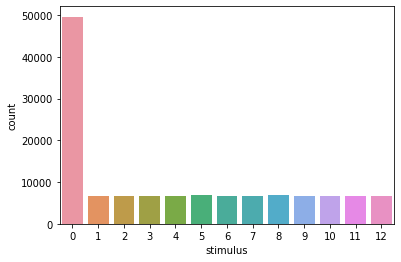

In [6]:
sns.countplot(x = 'stimulus', data=df)
y.value_counts()

---
Fixing Data Imbalance via Undersampling

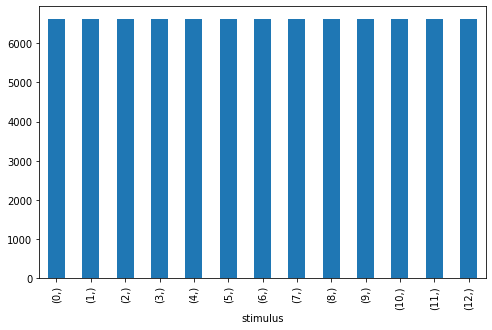

In [7]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot(kind='bar', figsize=(8,5))

In [8]:
y_res.value_counts()

stimulus
0           6613
1           6613
2           6613
3           6613
4           6613
5           6613
6           6613
7           6613
8           6613
9           6613
10          6613
11          6613
12          6613
dtype: int64

In [9]:
len(X_res.value_counts())

85969

In [10]:
print(y)

        stimulus
0              0
1              0
2              0
3              0
4              0
...          ...
130195        12
130196        12
130197        12
130198        12
130199        12

[130200 rows x 1 columns]


---
Visualization of Data Distributions

In [11]:
# #distribution of first 19 features


# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 20:
#     break 
# plt.tight_layout()

---
Defining Hyperparmaeters

In [12]:
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
emg_channels = 16
imu_channels = 3

latent_dim = 2
input_dim= 19
hidden_dim= 12
hidden_dim_2 = 6
output_dim = 19
num_classes = 13

num_epochs= 25
batch_size= 100
learning_rate= 0.0003 #3e-4 #Karpathy constant

beta = 0.65
alpha = 1

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

---
Train Test Split

In [13]:
X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

(85969, 19) <class 'numpy.ndarray'> (85969, 1) <class 'numpy.ndarray'>

X_train size: 51581 | X_val size: 17194 | X_test size: 17194
y_train size: 51581 | y_val size: 17194 | y_test size: 17194

Training Feature Split: (51581, 19) | Training Labels (51581, 1)
Validation Feature Split: (17194, 19) | Validation Labels (17194, 1)
Testing Feature Split: (17194, 19) | Testing Labels (17194, 1)



---
Data Preprocessing

In [14]:
#Data Preprocessing

# Split the data into EMG and IMU channels
X_train_emg = X_train[:, imu_channels:]
X_train_imu = X_train[:, :imu_channels]
X_train_emg = torch.from_numpy(X_train_emg).float()
X_train_imu = torch.from_numpy(X_train_imu).float()

X_val_emg = X_val[:, imu_channels:]
X_val_imu = X_val[:, :imu_channels]
X_val_emg = torch.from_numpy(X_val_emg).float()
X_val_imu = torch.from_numpy(X_val_imu).float()

X_test_emg = X_test[:, imu_channels:]
X_test_imu = X_test[:, :imu_channels]
X_test_emg = torch.from_numpy(X_test_emg).float()
X_test_imu = torch.from_numpy(X_test_imu).float()

class Preprocessor:
  def __init__(self, emg_channels, imu_channels):
    self.emg_channels = emg_channels
    self.imu_channels = imu_channels

  def preprocess(self, emg_data, imu_data):
    # Preprocess the EMG data
    emg_data = emg_data.view(emg_data.shape[0], 1, self.emg_channels)
    emg_data = nn.Conv1d(1, 1, kernel_size=5, padding=2, bias=False)(emg_data)
    emg_data = nn.BatchNorm1d(1)(emg_data)

    # Preprocess the IMU data
    imu_data = imu_data.view(imu_data.shape[0], 1, self.imu_channels)
    imu_data = nn.Conv1d(1, 1, kernel_size=5, padding=2, bias=False)(imu_data)
    imu_data = nn.BatchNorm1d(1)(imu_data)

    # Concatenate the processed EMG and IMU data
    processed_data = torch.cat([emg_data, imu_data], dim=2)

    return processed_data

# Initialize the preprocessor
preprocessor = Preprocessor(emg_channels, imu_channels)

# Preprocess the training data
X_train_preprocessed = preprocessor.preprocess(X_train_emg, X_train_imu)
X_train_preprocessed = X_train_preprocessed.view(X_train_preprocessed.shape[0], -1)
print(X_train_preprocessed.shape)

X_val_preprocessed = preprocessor.preprocess(X_val_emg, X_val_imu)
X_val_preprocessed = X_val_preprocessed.view(X_val_preprocessed.shape[0], -1)
print(X_val_preprocessed.shape)

X_test_preprocessed = preprocessor.preprocess(X_test_emg, X_test_imu)
X_test_preprocessed = X_test_preprocessed.view(X_test_preprocessed.shape[0], -1)
print(X_test_preprocessed.shape)

X_train_preprocessed = X_train_preprocessed.detach().numpy()
X_val_preprocessed = X_val_preprocessed.detach().numpy()
X_test_preprocessed = X_test_preprocessed.detach().numpy()

torch.Size([51581, 19])
torch.Size([17194, 19])
torch.Size([17194, 19])


In [15]:
#print(X_train_preprocessed)
X_train_preprocessed_array = X_train_preprocessed.reshape(-1, 19)
X_train_df = pd.DataFrame(X_train_preprocessed_array)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.092997,0.202148,-0.007205,-0.352916,-0.074040,-0.122343,-0.178363,-0.062866,-0.487053,-0.005380,-0.141541,-0.467556,-0.019149,0.041547,-0.068914,0.110674,0.129825,0.903862,-1.349723
1,0.255785,5.602331,-1.341444,0.670416,0.815663,0.586841,-2.331173,0.471600,1.660120,-1.737805,-0.356719,0.023257,-0.094070,-0.138989,0.056190,-0.138041,0.449199,1.088037,-1.379499
2,0.143654,-0.383194,4.448755,0.052446,-0.269873,-0.541622,-0.108931,-0.539619,-0.142732,-0.000877,-0.592055,-0.228287,0.028583,-0.143134,-0.832957,0.260175,0.418706,1.078343,-1.367759
3,0.364363,0.919496,0.306785,0.480296,0.196881,0.610795,-0.063386,3.420253,-0.171592,-0.574391,7.302566,-1.239325,-1.771304,1.324185,-0.884188,-0.300911,0.359848,1.044725,-1.303134
4,-0.001694,0.404424,-0.338703,-0.084692,0.069832,0.064361,-0.153547,-0.093549,-0.070849,-0.250522,-0.149233,-0.129537,-0.047756,-0.108192,0.129903,-0.050206,0.375976,1.082549,-1.345143


In [16]:
X_val_preprocessed_array = X_val_preprocessed.reshape(-1, 19)
X_val_df = pd.DataFrame(X_train_preprocessed_array)
X_val_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.092997,0.202148,-0.007205,-0.352916,-0.074040,-0.122343,-0.178363,-0.062866,-0.487053,-0.005380,-0.141541,-0.467556,-0.019149,0.041547,-0.068914,0.110674,0.129825,0.903862,-1.349723
1,0.255785,5.602331,-1.341444,0.670416,0.815663,0.586841,-2.331173,0.471600,1.660120,-1.737805,-0.356719,0.023257,-0.094070,-0.138989,0.056190,-0.138041,0.449199,1.088037,-1.379499
2,0.143654,-0.383194,4.448755,0.052446,-0.269873,-0.541622,-0.108931,-0.539619,-0.142732,-0.000877,-0.592055,-0.228287,0.028583,-0.143134,-0.832957,0.260175,0.418706,1.078343,-1.367759
3,0.364363,0.919496,0.306785,0.480296,0.196881,0.610795,-0.063386,3.420253,-0.171592,-0.574391,7.302566,-1.239325,-1.771304,1.324185,-0.884188,-0.300911,0.359848,1.044725,-1.303134
4,-0.001694,0.404424,-0.338703,-0.084692,0.069832,0.064361,-0.153547,-0.093549,-0.070849,-0.250522,-0.149233,-0.129537,-0.047756,-0.108192,0.129903,-0.050206,0.375976,1.082549,-1.345143


---
Scaling/Normalizing Data

In [17]:
#Normalization Data 
#----------------------------------------------------------------------------------------------------------
# Minmax without preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train)
# X_val_Normalized = Minmax.transform(X_val)
# X_test_Normalized = Minmax.transform(X_test)
#----------------------------------------------------------------------------------------------------------
# Minmax with preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train_preprocessed)
# X_val_Normalized = Minmax.transform(X_val_preprocessed)
# X_test_Normalized = Minmax.transform(X_test_preprocessed)

#----------------------------------------------------------------------------------------------------------
# Standardization without preprocessing
Standardized = preprocessing.StandardScaler()
X_train_Normalized= Standardized.fit_transform(X_train)
X_val_Normalized = Standardized.transform(X_val)
X_test_Normalized = Standardized.transform(X_test)

# Standardization with preprocessing
# Standardized = preprocessing.StandardScaler()
# X_train_Normalized= Standardized.fit_transform(X_train_preprocessed)
# X_val_Normalized = Standardized.transform(X_val_preprocessed)
# X_test_Normalized = Standardized.transform(X_test_preprocessed)
#----------------------------------------------------------------------------------------------------------

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Normalized).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Normalized).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Normalized).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([51581, 19]) , torch.Size([51581, 1])
Validation: torch.Size([17194, 19]) , torch.Size([17194, 1])
Testing:  torch.Size([17194, 19]) , torch.Size([17194, 1])


---
Defining Dataloaders


In [18]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

In [19]:
training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)


train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)

---
Defining VAE Model, Loss and Optmizers

In [20]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.encoder = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.Dropout(p=0.2),  # add dropout layer with probability p=0.2
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.Dropout(p=0.2),  # add dropout layer with probability p=0.2
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim_2),
    )
    self.mu = nn.Linear(hidden_dim_2, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim_2, latent_dim)   # log-var
    self.decoder = nn.Sequential(
        nn.Linear(latent_dim, hidden_dim_2),
        nn.Dropout(p=0.2),  # add dropout layer with probability p=0.2
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim),
        nn.Dropout(p=0.2),  # add dropout layer with probability p=0.2
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.Dropout(p=0.2),  # add dropout layer with probability p=0.2
        nn.ReLU(),
        nn.Linear(hidden_dim, input_dim),
    )
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 6),
        nn.ReLU(),
        nn.Linear(6, 13),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
    z = self.encoder(x)
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):

    return self.decoder(x)

  def forward(self, x):
#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   

    x_reconstructed = self.decode(z_reparmeterized)
    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(batch_size,input_dim)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, classified, mu, logvar = vae(x)
  print(f"Reconstruction X: {x_reconstructed.shape}")

  print(f"Mu: {mu.shape} ")
  
  print(f"Logvar: {logvar.shape}")
 
  print(f"Latent Space Z: {z_reparmeterized.shape}")
 
  print(f"Classifier: {classified.shape}")

Reconstruction X: torch.Size([100, 19])
Mu: torch.Size([100, 2]) 
Logvar: torch.Size([100, 2])
Latent Space Z: torch.Size([100, 2])
Classifier: torch.Size([100, 13])


In [21]:
model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=19, out_features=12, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=12, out_features=12, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=6, bias=True)
  )
  (mu): Linear(in_features=6, out_features=2, bias=True)
  (logvar): Linear(in_features=6, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=6, out_features=12, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=12, bias=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): ReLU()
    (9): Linear(in_features=12, out_features=19, bias=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_feature

In [22]:
def mutual_information_loss(latent_representation, labels):
  """
  Calculates the mutual information loss between the latent representation
  and the labels.

  Parameters:
  - latent_representation: the latent representation of the data
  - labels: the one-hot encoded labels of the data
  - device: the device to use for calculations

  Returns:
  - The mutual information loss between the latent representation and labels
  """
  # Reshape the latent representation tensor to have the same shape as the labels tensor
  latent_representation = latent_representation.view(-1, labels.shape[1])

  # Calculate the mutual information loss
  mutual_information = (latent_representation * torch.log(latent_representation / labels)).sum(dim=1)
  return mutual_information.mean()

---
Train and Validation loop

In [23]:
train_losses=[]
train_accuracy = []
val_losses=[]
val_accuracy=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())


from tensorboardX import SummaryWriter

# Create a SummaryWriter object
writer = SummaryWriter() 

for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data
   
    optimizer.zero_grad()

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    # Compute the reconstruction loss and KL divergence loss ##########################################

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())



    # # Compute the mutual information loss #########################################################

    # # Convert the labels to an integer tensor
    # int_labels = labels.long()
    # # One-hot encode the labels
    # num_classes = torch.max(int_labels).item() + 1  # Change this to match the number of unique classes in the labels tensor
    # labels_one_hot = F.one_hot(int_labels, num_classes=num_classes).float()

    # # Reshape the latent representation tensor to have the same shape as the labels tensor
    # z_reparmeterized_mi = z_reparmeterized.view(-1, labels_one_hot.shape[1])
    # # Check if any of the values in the latent tensor are nan
    # if torch.isnan(z_reparmeterized).any():
    #   # Print a message or perform some other action if nan values are present in the tensor
    #   print("Latent tensor contains nan values")
    # else:
    #   # Calculate the mutual information loss
    #   mutual_information = (z_reparmeterized_mi * torch.log(z_reparmeterized_mi / (labels_one_hot + 1e-6))).sum(dim=1)

    #   # Compute the mutual information loss
    #   information_loss = mutual_information.mean()



    # Compute the classificaiton loss ########################################################################
    classified = classified.view(-1,13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    loss = (alpha*reconstruction_loss + kld_loss*beta) + classification_loss 

    accuracy = accuracy_score(labels, classified.argmax(dim=1))
    train_accuracy.append(accuracy)
    train_acc = sum(train_accuracy)/len(train_accuracy)

    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log for latent space visualziation (gif)...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

   # Write the scalar values to TensorBoard
    writer.add_scalar('loss/total', loss.item(), i)
    writer.add_scalar('loss/reconstruction', reconstruction_loss.item(), i)
    writer.add_scalar('loss/kld', kld_loss.item(), i)
    writer.add_scalar('loss/classification', classification_loss.item(), i)

  writer.add_embedding(z_reparmeterized, metadata=labels, global_step=epoch)

  with torch.inference_mode():
    val_running_loss = 0
    val_running_acc = 0

    model.eval()
    # Iterate over the validation data
    for X, Y in val_loader:
      # Pass the data through the model and get the reconstructed data and the latent representation
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)

      # Compute the reconstruction loss
      v_reconstruction_loss = loss_fn(y_pred, X)

      # Compute the KL divergence loss
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      # Reshape the classified output to have the same shape as the labels
      v_classified = v_classified.view(-1, 13)

      # Compute the classification loss
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      # Compute the total loss
      vloss = (alpha*v_reconstruction_loss + v_kld_loss*beta) + v_classification_loss

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      v_accuracy = accuracy_score(Y, v_classified.argmax(dim=1))
      val_accuracy.append(v_accuracy)
      val_acc = sum(val_accuracy)/len(val_accuracy)

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | classifcation loss: {classification_loss:.5f} | total loss: {train_loss:.3f} | train acc: {train_acc*100:.3f} % ||| Val Loss: {val_loss:.3f} | val acc: {val_acc*100:.3f} %")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Close the SummaryWriter
writer.close()

ModuleNotFoundError: ignored

In [ ]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

---
Model Evaluations

In [ ]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

---
Latent Space Visualization

In [ ]:
print("Latent Space Visualization")
for i in range (num_epochs):
  fig = plt.figure(figsize=(10,10))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()

  #Experiment 1
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('hsv', 13))
  cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],values=[0,1,2,3,4,5,6,7,8,9,10,11,12])
  #Experiment 3
  # plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
  #             cmap=plt.cm.get_cmap('hsv', 23))
  #cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
  cb.ax.tick_params(labelsize=10)
  plt.xlim(-5, 5)
  plt.ylim(-5, 5)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title(f'VAE train dataset with latent space Dim=2  Epoch number: {i+1} ', fontsize= 12)
  # plt.show()
  plt.close()
  fig.savefig(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i:001}" + ".png")
  print(f"Latent Space Image {i+1} stored.")
print()
print("Latent Space Gif being created...")
print()

import imageio
gif = []
for i in range(num_epochs):
  each_image = imageio.imread(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i}" + ".png")# here read all images
  gif.append(each_image)
imageio.mimsave("/content/result.gif",gif)

from IPython.display import Image

fname = '/content/result.gif'
Image(open(fname, 'rb').read())  # local

In [ ]:
%tensorboard --logdir=runs

---
Test
---

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")
print()

class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)

##########################################################################################################################################################################################################
#Hyperparameters
latent_dim = 2
input_dim= 19
hidden_dim= 9
output_dim = 19
num_classes = 13

num_epochs= 70
batch_size= 100
learning_rate= 0.001 #3e-4 #Karpathy constant


#beta = 1
beta = 0.005
alpha = 1
#############################################################################################################################################################################################################

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 13),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x))
    z = torch.tanh(z) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")

    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

train_losses=[]
train_accuracy = []
val_losses=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data

    optimizer.zero_grad()

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    loss = (alpha*reconstruction_loss + kld_loss*beta) + classification_loss

    # correct = torch.eq(classified.argmax(dim=1), labels).float()
    # classifcaiton_accuracy = correct.mean()

    # Calculate classification accuracy
    _, predicted = torch.max(classified, 1)
    correct = (predicted == labels.flatten()).sum().item()
    classifcaiton_accuracy = correct / len(predicted)



    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log ...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      v_classified = v_classified.view(-1, 13)
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      vloss = (alpha*reconstruction_loss + kld_loss*beta) + v_classification_loss

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)


  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | classifcation loss: {classification_loss:.5f} | total loss: {train_loss:.3f} | train acc: {classifcaiton_accuracy:.3f} ||| Val Loss: {val_loss:.3f} | val acc: {val_acc:.3f}")
  print("------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>

(85969, 19) <class 'numpy.ndarray'> (85969, 1) <class 'numpy.ndarray'>

X_train size: 51581 | X_val size: 17194 | X_test size: 17194
y_train size: 51581 | y_val size: 17194 | y_test size: 17194

Training Feature Split: (51581, 19) | Training Labels (51581, 1)
Validation Feature Split: (17194, 19) | Validation Labels (17194, 1)
Testing Feature Split: (17194, 19) | Testing Labels (17194, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([51581, 19]) , torch.Size([51581, 1])
Validation: torch.Size([17194, 19]) , torch.Size([17194, 1])
Testing:  torch.Size([17194, 19]) , torch.Size([17194, 1])

VAE(
  (fc1): Linear(in_features=19, out_features=9, bias=True)
  (mu): Linear(in_features=9, out_features=2, bias=True)
  (logvar): 

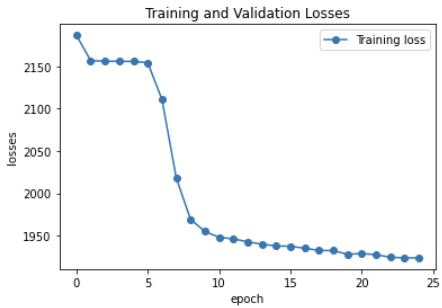